In [21]:
!pip install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [55]:
!pip install pillow

In [ ]:
!pip install PIL

In [93]:
!pip install swifter

  Created wheel for swifter: filename=swifter-1.1.3-py3-none-any.whl size=13077 sha256=9febefa8edc305cec808674707d44a3e35ae6f4c9daedca3696ffc10259079a3
  Stored in directory: c:\users\gauta\appdata\local\pip\cache\wheels\74\3d\e2\d1dd012c80fc23170d95b7fb202c587a01cf7be325dd16e1b1
Successfully built swifter


In [131]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import os # accessing directory structure

In [132]:
import pandas as pd
import numpy as np

In [133]:
from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img

In [134]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [159]:
ordersExport = pd.read_csv('orders_export.csv')
productsExport = pd.read_csv('products_export.csv')

In [160]:
productsExport = productsExport[productsExport['Tags'].isnull() == False]
print(productsExport.shape)
productsExport.head(2)

(163, 49)


,Handle,Title,Body (HTML),Vendor,Standardized Product Type,Custom Product Type,Tags,Published,Option1 Name,Option1 Value,...,Google Shopping / Custom Label 0,Google Shopping / Custom Label 1,Google Shopping / Custom Label 2,Google Shopping / Custom Label 3,Google Shopping / Custom Label 4,Variant Image,Variant Weight Unit,Variant Tax Code,Cost per item,Status
0,ishya-blockprinted-kurta-set,Ishya Blockprinted Kurta (Set of 2),"<p data-mce-fragment=""1""><strong data-mce-frag...",House Of Dhaaga,NaN,Kurta Sets,"Category_Kurta Sets, Category_Women, Collectio...",True,Size,XS,...,NaN,NaN,NaN,NaN,NaN,NaN,kg,NaN,NaN,active
10,ahaana-blockprinted-kurta-set,Ahaana Blockprinted Kurta (Set of 2),"<p data-mce-fragment=""1""><strong data-mce-frag...",House Of Dhaaga,NaN,Kurta Sets,"Category_Kurta Sets, Category_Women, Collectio...",True,Size,XS,...,NaN,NaN,NaN,NaN,NaN,NaN,kg,NaN,NaN,active


In [162]:
productsExport = productsExport[['Title', 'Image Src', 'Variant SKU']]
productsExport = productsExport.rename(columns={'Image Src': 'image'})
print(productsExport.shape)
productsExport.head()

(163, 3)


,Title,image,Variant SKU
0,Ishya Blockprinted Kurta (Set of 2),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0772
10,Ahaana Blockprinted Kurta (Set of 2),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0766
21,Seher Blockprinted Kurta (Set of 2),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0760
29,Mihira Blockprinted Kurta (Set of 3),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0754
41,Bahar Blockprinted Kurta (Set of 3),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0748


In [163]:
productsExport = productsExport.iloc[0:19]
productsExport

,Title,image,Variant SKU
0,Ishya Blockprinted Kurta (Set of 2),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0772
10,Ahaana Blockprinted Kurta (Set of 2),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0766
21,Seher Blockprinted Kurta (Set of 2),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0760
29,Mihira Blockprinted Kurta (Set of 3),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0754
41,Bahar Blockprinted Kurta (Set of 3),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0748
55,Keya Blockprinted Kurta (Set of 3),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0742
70,Ekta Kaftan,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0727
76,Barna Kaftan,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0721
82,Saukhayada Kaftan,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0715
88,Chesna Kaftan,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0709


In [164]:
productsExport = productsExport.reset_index(drop=True)
productsExport

,Title,image,Variant SKU
0,Ishya Blockprinted Kurta (Set of 2),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0772
1,Ahaana Blockprinted Kurta (Set of 2),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0766
2,Seher Blockprinted Kurta (Set of 2),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0760
3,Mihira Blockprinted Kurta (Set of 3),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0754
4,Bahar Blockprinted Kurta (Set of 3),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0748
5,Keya Blockprinted Kurta (Set of 3),https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0742
6,Ekta Kaftan,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0727
7,Barna Kaftan,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0721
8,Saukhayada Kaftan,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0715
9,Chesna Kaftan,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0709


In [165]:
# !pip install opencv-python

In [166]:
def show_image_from_url(image_url):

    """
    Fetches image online from the image_url and plots it as it is using matplotlib's pyplot's image show
    """

    response = urllib.request.urlopen(image_url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
    image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
#     print(response)
    return image_rgb
    

In [167]:
def load_image(img, resized_fac = 0.1):
#     img     = cv2.imread(show_image_from_url(img))
    img = show_image_from_url(img)
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

In [168]:
# load_image('https://cdn.shopify.com/s/files/1/0477/4992/2972/products/3_88a16d80-10e7-4a6c-88cd-19fa540bd2d6.jpg?v=1650786705')

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x219b5113490>, (-0.5, 1199.5, 1799.5, -0.5))

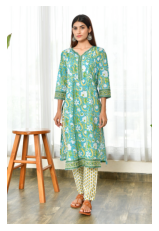

In [169]:
plt.figure()
# image_bgr = show_image_from_url(productsExport['image'].loc[2])
# image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(show_image_from_url(productsExport['image'].iloc[2])), plt.axis('off')

In [170]:
import tensorflow as tf
import keras
from keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__

'2.8.0'

In [171]:
# Input Shape
img_width, img_height, _ = 1800, 1200, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 57, 38, 2048)      23587712  
                                                                 
 global_max_pooling2d_5 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [172]:
def get_embedding(model, img_name):
    print(img_name)
    # Reshape
#     img = image.load_img(img_name, target_size=(img_width, img_height))
    img = show_image_from_url(img_name)
#     print(img)
    # img to Array
    x   = image.img_to_array(img)
#     print(x)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [173]:
# load_img('https://cdn.shopify.com/s/files/1/0477/4992/2972/products/3_88a16d80-10e7-4a6c-88cd-19fa540bd2d6.jpg?v=1650786705')

In [174]:
emb = get_embedding(model, productsExport.iloc[1].image)
emb.shape

https://cdn.shopify.com/s/files/1/0477/4992/2972/products/1_ba8cf0cc-5192-410d-88ef-79003da54375.jpg?v=1650366773


(2048,)

(180, 120, 3)
[ 8.793192  11.449055   5.0268507 ... 12.369025  13.631015  33.018913 ]


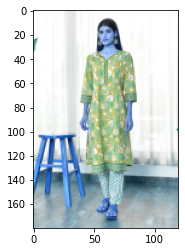

In [175]:
img_array = load_image(productsExport.iloc[2].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [176]:
%%time
#import swifter

# Parallel apply
map_embeddings = productsExport['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

https://cdn.shopify.com/s/files/1/0477/4992/2972/products/3_88a16d80-10e7-4a6c-88cd-19fa540bd2d6.jpg?v=1650786705
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/1_ba8cf0cc-5192-410d-88ef-79003da54375.jpg?v=1650366773
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/7_6c4c1f2e-ef1f-4b17-ac24-e3c21ab6f8ba.jpg?v=1650366887
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/5_28ed5be0-cddf-4ab8-a93e-720d30ea6bd0.jpg?v=1650366863
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/13_3f707b81-8012-41ac-b914-28f381a38080.jpg?v=1650368630
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/6_00f1ddfe-3098-4131-9616-9379610ed022.jpg?v=1650786650
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/30_2a5844f7-f320-46b4-9d5d-37210c432446.png?v=1635850960
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/51.png?v=1635850268
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/32_cc3850c0-805e-4ec2-8b61-71adfa92b479.png?v=1635850520
https:/

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,20.586622,20.105677,12.107643,11.163271,9.893868,3.563166,13.861944,7.705441,6.954333,25.356749,...,15.097315,7.620796,4.541094,18.841145,16.909399,19.613054,6.633142,10.753406,10.191362,44.637928
1,8.793192,11.449055,5.026851,12.345861,11.886070,6.473016,16.804865,8.632877,5.341212,16.659184,...,12.424707,7.142735,3.940211,13.208349,8.349095,7.577753,6.331432,12.369025,13.631015,33.018913
2,15.140202,11.787365,17.924599,15.343410,9.063828,10.002635,14.093907,5.543682,4.738134,14.731933,...,10.063923,8.138678,3.960552,15.651771,13.358135,9.411799,8.749480,10.380952,9.866847,23.210533
3,18.949446,17.190123,17.870956,11.182445,5.408262,6.888535,6.955783,7.705895,6.576445,14.987641,...,10.293889,10.478212,5.527157,10.966778,9.482422,9.330651,9.242818,17.398350,7.511912,26.432198
4,10.955932,14.345816,14.079767,13.932893,6.422567,7.448464,15.348124,10.458452,9.020885,20.944908,...,11.918998,8.332247,5.201797,16.722898,14.752211,7.259862,10.836466,20.459419,17.988533,24.614832


In [177]:
df_embs = df_embs.reset_index(drop=True)
df_embs.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,20.586622,20.105677,12.107643,11.163271,9.893868,3.563166,13.861944,7.705441,6.954333,25.356749,...,15.097315,7.620796,4.541094,18.841145,16.909399,19.613054,6.633142,10.753406,10.191362,44.637928
1,8.793192,11.449055,5.026851,12.345861,11.886070,6.473016,16.804865,8.632877,5.341212,16.659184,...,12.424707,7.142735,3.940211,13.208349,8.349095,7.577753,6.331432,12.369025,13.631015,33.018913
2,15.140202,11.787365,17.924599,15.343410,9.063828,10.002635,14.093907,5.543682,4.738134,14.731933,...,10.063923,8.138678,3.960552,15.651771,13.358135,9.411799,8.749480,10.380952,9.866847,23.210533
3,18.949446,17.190123,17.870956,11.182445,5.408262,6.888535,6.955783,7.705895,6.576445,14.987641,...,10.293889,10.478212,5.527157,10.966778,9.482422,9.330651,9.242818,17.398350,7.511912,26.432198
4,10.955932,14.345816,14.079767,13.932893,6.422567,7.448464,15.348124,10.458452,9.020885,20.944908,...,11.918998,8.332247,5.201797,16.722898,14.752211,7.259862,10.836466,20.459419,17.988533,24.614832


In [178]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.99999857, 0.9213743 , 0.9266668 , 0.91472864],
       [0.9213743 , 0.999999  , 0.90986633, 0.9165    ],
       [0.9266668 , 0.90986633, 0.99999934, 0.9217516 ],
       [0.91472864, 0.9165    , 0.9217516 , 0.9999999 ]], dtype=float32)

In [182]:
sku = productsExport['Variant SKU']
sku

0     HOD0772
1     HOD0766
2     HOD0760
3     HOD0754
4     HOD0748
5     HOD0742
6     HOD0727
7     HOD0721
8     HOD0715
9     HOD0709
10    HOD0703
11    HOD0697
12    HOD0741
13    HOD0740
14    HOD0739
15    HOD0738
16    HOD0737
17    HOD0736
18    HOD0735
Name: Variant SKU, dtype: object

In [183]:
indices = pd.Series(range(len(productsExport)), index=productsExport.index)
indices

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
dtype: int64

In [184]:
# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, productsExport, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return sku.iloc[idx_rec], idx_sim

get_recommender(12, productsExport, top_n = 5)

(14    HOD0739
 18    HOD0735
 17    HOD0736
 13    HOD0740
 16    HOD0737
 Name: Variant SKU, dtype: object,
 [0.90447, 0.9007696, 0.89949554, 0.89621544, 0.89372116])

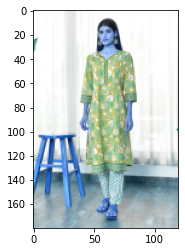

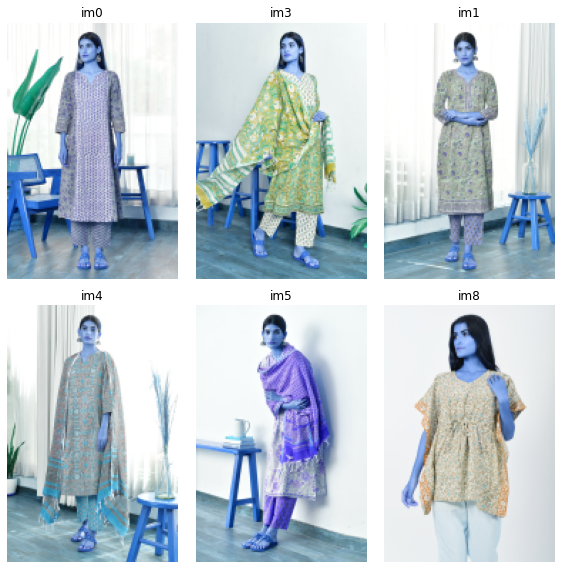

In [180]:
# Idx Item to Recommender
idx_ref = 2

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, productsExport, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(productsExport.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in productsExport.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)